In [163]:
import matplotlib
import re
import warnings
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import earthpy.mask as em
import pandas as pd 

In [99]:
warnings.simplefilter('ignore')

In [205]:
# Update the file location depending on the month

FILE_PATH1 = "C://Users/User/Desktop/NASA hackathon/May/MOD13A2.A2020129.h17v03.006.2020145235844.hdf" 
FILE_PATH2 = "C://Users/User/Desktop/NASA hackathon/May/MOD13A2.A2020129.h18v03.006.2020145235028.hdf" 

In [206]:
with rio.open(FILE_PATH1) as dataset:
    print(dataset)
    hdf4_meta1 = dataset.meta
    
with rio.open(FILE_PATH2) as dataset:
    print(dataset)
    hdf4_meta2 = dataset.meta

<open DatasetReader name='C://Users/User/Desktop/NASA hackathon/May/MOD13A2.A2020129.h17v03.006.2020145235844.hdf' mode='r'>
<open DatasetReader name='C://Users/User/Desktop/NASA hackathon/May/MOD13A2.A2020129.h18v03.006.2020145235028.hdf' mode='r'>


In [207]:
hdf4_meta1

{'driver': 'HDF4',
 'dtype': 'float_',
 'nodata': None,
 'width': 512,
 'height': 512,
 'count': 0,
 'crs': None,
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0)}

In [208]:
hdf4_meta2

{'driver': 'HDF4',
 'dtype': 'float_',
 'nodata': None,
 'width': 512,
 'height': 512,
 'count': 0,
 'crs': None,
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0)}

In [209]:
with rio.open(FILE_PATH1) as dataset:
    crs1 = dataset.read_crs()
    for name in dataset.subdatasets:
        print(name)

HDF4_EOS:EOS_GRID:C://Users/User/Desktop/NASA hackathon/May/MOD13A2.A2020129.h17v03.006.2020145235844.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI
HDF4_EOS:EOS_GRID:C://Users/User/Desktop/NASA hackathon/May/MOD13A2.A2020129.h17v03.006.2020145235844.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle
HDF4_EOS:EOS_GRID:C://Users/User/Desktop/NASA hackathon/May/MOD13A2.A2020129.h17v03.006.2020145235844.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days composite day of the year
HDF4_EOS:EOS_GRID:C://Users/User/Desktop/NASA hackathon/May/MOD13A2.A2020129.h17v03.006.2020145235844.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days pixel reliability
HDF4_EOS:EOS_GRID:C://Users/User/Desktop/NASA hackathon/May/MOD13A2.A2020129.h17v03.006.2020145235844.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI
HDF4_EOS:EOS_GRID:C://Users/User/Desktop/NASA hackathon/May/MOD13A2.A2020129.h17v03.006.2020145235844.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality
HDF4_EOS:EOS_GRID:C://Users/User/Desktop/NASA hackathon

In [210]:
with rio.open(FILE_PATH2) as dataset:
    crs2 = dataset.read_crs()
    for name in dataset.subdatasets:
        print(name)

HDF4_EOS:EOS_GRID:C://Users/User/Desktop/NASA hackathon/May/MOD13A2.A2020129.h18v03.006.2020145235028.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI
HDF4_EOS:EOS_GRID:C://Users/User/Desktop/NASA hackathon/May/MOD13A2.A2020129.h18v03.006.2020145235028.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days relative azimuth angle
HDF4_EOS:EOS_GRID:C://Users/User/Desktop/NASA hackathon/May/MOD13A2.A2020129.h18v03.006.2020145235028.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days composite day of the year
HDF4_EOS:EOS_GRID:C://Users/User/Desktop/NASA hackathon/May/MOD13A2.A2020129.h18v03.006.2020145235028.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days pixel reliability
HDF4_EOS:EOS_GRID:C://Users/User/Desktop/NASA hackathon/May/MOD13A2.A2020129.h18v03.006.2020145235028.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI
HDF4_EOS:EOS_GRID:C://Users/User/Desktop/NASA hackathon/May/MOD13A2.A2020129.h18v03.006.2020145235028.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days VI Quality
HDF4_EOS:EOS_GRID:C://Users/User/Desktop/NASA hackathon

In [214]:
NDVI_index1 = None

with rio.open(FILE_PATH1) as dataset:
    with rio.open('HDF4_EOS:EOS_GRID:C://Users/User/Desktop/NASA hackathon/May/MOD13A2.A2020129.h17v03.006.2020145235844.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI') as subdataset:
        modis_meta = subdataset.profile
        NDVI_index1 = subdataset.read(1)

        
NDVI_index2 = None

with rio.open(FILE_PATH1) as dataset:
    with rio.open("HDF4_EOS:EOS_GRID:C://Users/User/Desktop/NASA hackathon/May/MOD13A2.A2020129.h18v03.006.2020145235028.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days NDVI") as subdataset:
        modis_meta = subdataset.profile
        NDVI_index2 = subdataset.read(1)

In [215]:
# delete most of the right map as we don't care about Russia etc
# adjust how much of the map we don't want
newNDVI_index2 = np.delete(NDVI_index2, np.s_[int(0.5*len(NDVI_index2)):len(NDVI_index2)], axis=1)

#merge NDVI_index1 and NDVI_index2
result_NDVI = np.hstack((NDVI_index1, newNDVI_index2))

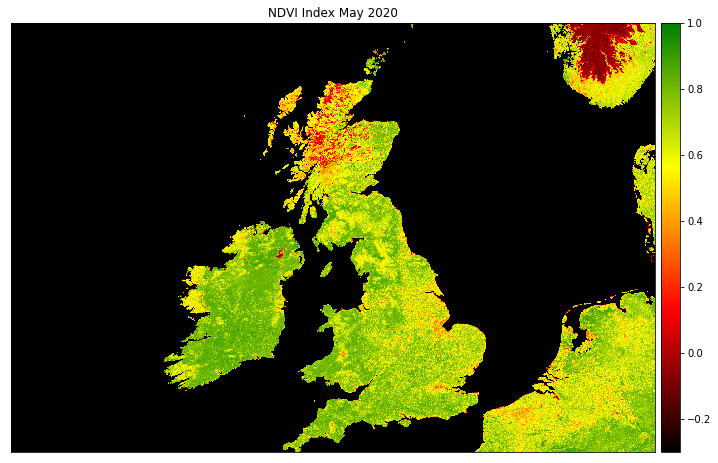

In [216]:
colours_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "red","yellow","green"])
Jan_NDVI = ep.plot_bands(result_NDVI*0.0001, scale=False, title = "NDVI Index May 2020", cmap = colours_cmap)

In [217]:
EVI_index1 = None

with rio.open(FILE_PATH) as dataset:
    with rio.open('HDF4_EOS:EOS_GRID:C://Users/User/Desktop/NASA hackathon/May/MOD13A2.A2020129.h17v03.006.2020145235844.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI') as subdataset:
        modis_meta = subdataset.profile
        EVI_index1 = subdataset.read(1)
        
EVI_index2 = None

with rio.open(FILE_PATH) as dataset:
    with rio.open("HDF4_EOS:EOS_GRID:C://Users/User/Desktop/NASA hackathon/May/MOD13A2.A2020129.h18v03.006.2020145235028.hdf:MODIS_Grid_16DAY_1km_VI:1 km 16 days EVI") as subdataset:
        modis_meta = subdataset.profile
        EVI_index2 = subdataset.read(1)

In [218]:
# delete most of the right map as we don't care about Russia etc
# adjust how much of the map we don't want
newEVI_index2 = np.delete(EVI_index2, np.s_[int(0.5*len(EVI_index2)):len(EVI_index2)], axis=1)

#merge NDVI_index1 and NDVI_index2
result_EVI = np.hstack((EVI_index1, newEVI_index2))

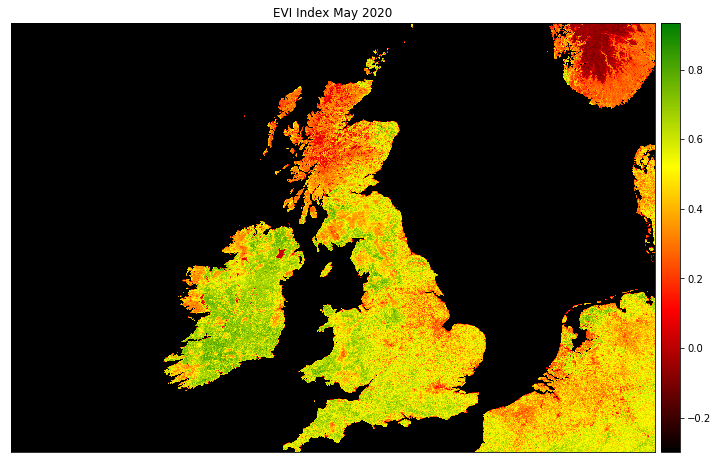

In [219]:
colours_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "red","yellow","green"])
Jan_EVI = ep.plot_bands(result_EVI*0.0001, scale=False, title = "EVI Index May 2020", cmap = colours_cmap)

In [220]:
pd.DataFrame(result_NDVI).to_csv("C://Users/User/Desktop/NASA hackathon/May/NDVIMay2020.csv")
pd.DataFrame(result_EVI).to_csv("C://Users/User/Desktop/NASA hackathon/May/EVIMay2020.csv")